<a href="https://colab.research.google.com/github/delademf/MNIST_deepLearning/blob/main/MNIST_deeplearning_CNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist # has images of hand written images 0-9
(x_train,y_train),(x_test,y_test) = mnist.load_data()


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

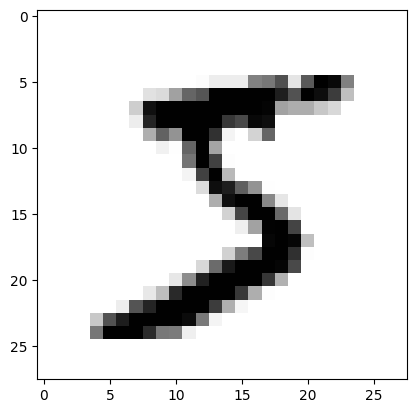

In [14]:
plt.imshow(x_train[0],cmap= plt.cm.binary)
print(x_train[0])
#x_train =tf.keras.utils.normalize(x_train,axis=1) #values are now scaled between 0and 1 to hel it better learn

build model

In [17]:
model = Sequential()
model.add(tf.keras.layers.Flatten())
#now build the hidden layters
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
#output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))# softmax beacuse its a probability distribution

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#optimizer(adam/SGD(stoichastic Gradient Descent)),loss(binarycrossentropy/sparse_categorical_crosssentropy)

In [18]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7217 - accuracy: 0.8705
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3892 - accuracy: 0.9217
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2510 - accuracy: 0.9389
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1858 - accuracy: 0.9512
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1506 - accuracy: 0.9582


In [20]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1819 - accuracy: 0.9496
0.18186236917972565 0.9495999813079834


In [23]:
model.save('num_reader.model')# to save model for reuse
new_model =tf.keras.models.load_model('num_reader.model') #to load saved model
predictions =new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [25]:
print(predictions)

[[1.32341442e-20 1.88734219e-11 2.05561008e-08 ... 9.99974668e-01
  3.73191998e-11 1.87346689e-06]
 [8.98970584e-24 2.68379707e-10 9.99997795e-01 ... 9.32435795e-10
  1.80947882e-10 6.06900671e-20]
 [7.82599636e-06 9.99812126e-01 1.49516529e-06 ... 3.46739544e-05
  5.12870520e-06 8.42228110e-05]
 ...
 [5.04903758e-12 1.69678640e-06 1.03129172e-10 ... 6.24432869e-06
  7.53878794e-06 6.04446791e-03]
 [1.37469358e-35 4.88183970e-29 1.47278403e-28 ... 1.88260947e-17
  1.65869126e-19 2.50298598e-22]
 [2.85217880e-06 3.42873733e-13 1.09119654e-07 ... 5.99445840e-13
  1.90584206e-08 1.22988473e-08]]


In [30]:
import numpy as np
print(np.argmax(predictions[110]))

8


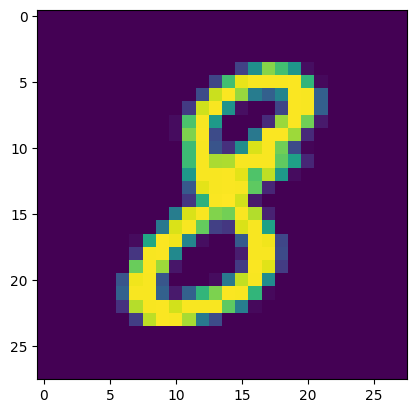

In [31]:
plt.imshow(x_test[110])